# Loan Prediction

Business Objective

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Import Data

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100) #Satır ve sütunların hepsini göstermeye yarıyor

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

### EDA - Exploratory Data Anlysis

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [5]:
df.sample(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
177430,b06312a1-b60e-4f0b-92a4-1348edd8acca,3b1f5ce4-292e-43bb-a30e-7b606d415f73,Fully Paid,24915,Short Term,741.0,NaN,Home Mortgage,49864.0,Home Improvements,$333.68,28.0,NaN,11,0,13328,68347,0.0,0.0


In [6]:
df.shape

(256984, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [9]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [11]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [12]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [13]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [14]:
df["Monthly Debt"].unique()

array(['$584.03', '$1,106.04 ', '$1,321.85 ', ..., '$707.08', '$47.11',
       '$2,525.82 '], dtype=object)

In [15]:
df["Maximum Open Credit"].unique()

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

In [16]:
df["Bankruptcies"].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

<Axes: ylabel='Credit Score'>

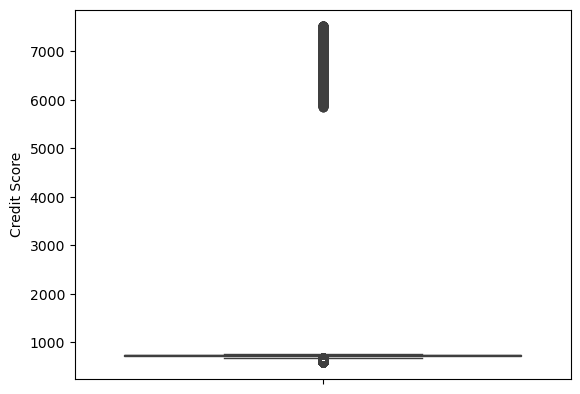

In [17]:
sns.boxplot(df["Credit Score"])

<Axes: ylabel='Annual Income'>

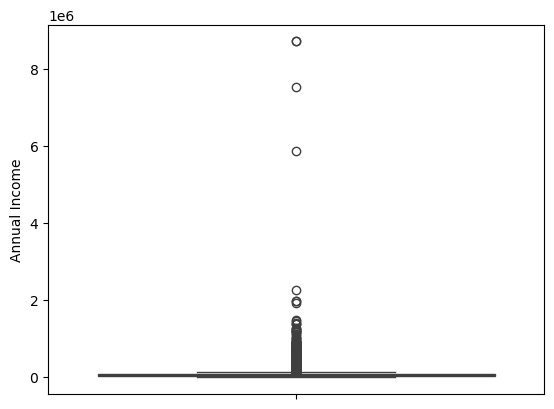

In [18]:
sns.boxplot(df["Annual Income"])

<Axes: ylabel='Annual Income'>

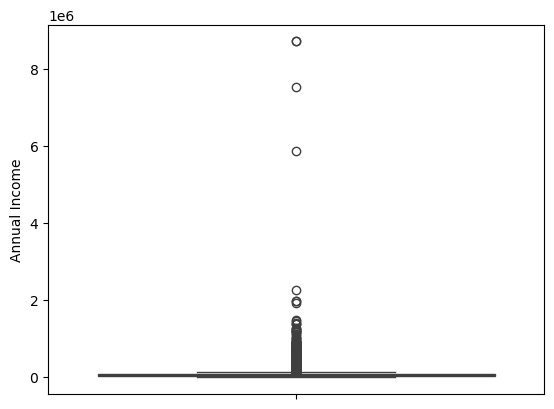

In [19]:
sns.boxplot(df["Annual Income"])

<Axes: ylabel='Current Credit Balance'>

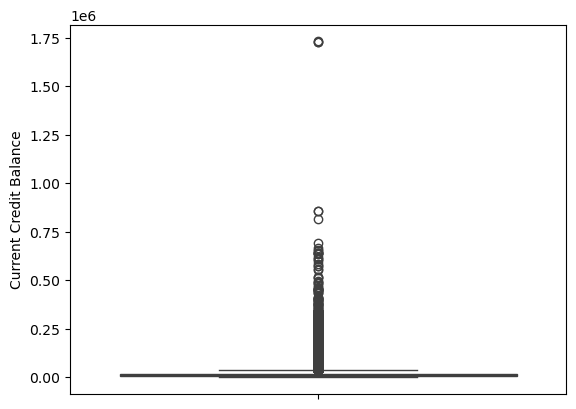

In [20]:
sns.boxplot(df["Current Credit Balance"])

<Axes: ylabel='Years of Credit History'>

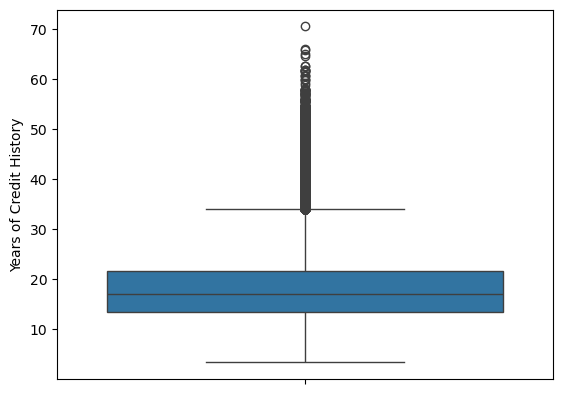

In [21]:
sns.boxplot(df["Years of Credit History"])

In [22]:
# sns.boxplot(df["Monthly Debt"])

### Feature Engineering

In [23]:
del df["Loan ID"]

In [24]:
del df["Customer ID"]

In [25]:
df['Monthly Debt2'] = df['Monthly Debt'].str.replace('$', '')

In [26]:
df['Monthly Debt'] = df['Monthly Debt2'].str.replace(',', '').astype(float)

In [27]:
del df["Monthly Debt2"]

In [28]:
df['Purpose'] = df['Purpose'].str.replace("other", 'Other')

In [29]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].str.replace('#VALUE!',"0")

In [30]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].astype(float)

In [31]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].mean())

In [32]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].astype(int)

In [33]:
df["Home Ownership"]=df["Home Ownership"].str.replace("HaveMortgage", "Home Mortgage")

In [34]:
df['Years in current job'] = df['Years in current job'].str.replace(r'\+', '', regex=True)

In [35]:
df['Years in current job']=df['Years in current job'].str.extract('(\d+)', expand=False).fillna(0).astype(int)

In [36]:
df['Years in current job']=df['Years in current job'].astype(int)

In [37]:
df['Years in current job']=df['Years in current job'].fillna(5)

In [38]:
df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].mean())

In [39]:
df["Annual Income"]=df["Annual Income"].fillna(df["Annual Income"].mean())

In [40]:
df["Months since last delinquent"]=df["Months since last delinquent"].fillna(0)

In [41]:
df["Bankruptcies"]=df["Bankruptcies"].fillna(0)

In [42]:
df["Tax Liens"]=df["Tax Liens"].fillna(0)

In [43]:
outliers=df.quantile(q=.97, numeric_only=True)

In [44]:
df=df[df["Annual Income"]<outliers["Annual Income"]]

In [45]:
df=df[df["Current Credit Balance"]<outliers["Current Credit Balance"]]

In [46]:
df=df[df["Monthly Debt"]<outliers["Monthly Debt"]]

In [47]:
df["Credit Score"].value_counts()

Credit Score
1251.116099    58545
740.000000      5169
747.000000      5117
741.000000      5112
746.000000      4958
               ...  
5850.000000        2
5980.000000        2
5920.000000        2
5860.000000        1
5930.000000        1
Name: count, Length: 335, dtype: int64

In [48]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x > 850 else x)

In [49]:
df['Credit Score']=df['Credit Score'].astype(int)

In [50]:
df["Credit Score"].value_counts()

Credit Score
125    58545
740     5495
741     5433
747     5295
746     5186
       ...  
590       19
589       17
585       16
591       14
593       11
Name: count, Length: 168, dtype: int64

In [51]:
df["Credit Score"].max()

751

In [52]:
df = df.replace({"Fully Paid":1,"Charged Off":0})

In [53]:
df.corr(numeric_only=True)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,0.270088,0.021670,0.019101,0.092576,-0.029867,0.031608,0.000515,-0.022370,-0.007414,-0.015749,0.011314,0.003148,-0.010524
Current Loan Amount,0.270088,1.000000,0.231723,0.008094,0.002340,-0.008203,0.012400,-0.003415,-0.003916,0.000415,-0.003911,0.001929,0.004317,-0.003398
Credit Score,0.021670,0.231723,1.000000,-0.002803,-0.137130,-0.020384,0.002583,-0.006301,-0.005846,-0.002034,-0.007714,0.002558,0.000109,-0.002488
Years in current job,0.019101,0.008094,-0.002803,1.000000,0.148082,0.162700,0.148679,0.037981,0.054393,0.023243,0.137204,0.012862,0.024158,0.003285
Annual Income,0.092576,0.002340,-0.137130,0.148082,1.000000,0.456647,0.153264,0.041081,0.160604,-0.007047,0.290722,0.035328,-0.034264,0.035664
Monthly Debt,-0.029867,-0.008203,-0.020384,0.162700,0.456647,1.000000,0.147348,0.032493,0.408183,-0.040505,0.482887,0.036623,-0.059028,0.017766
Years of Credit History,0.031608,0.012400,0.002583,0.148679,0.153264,0.147348,1.000000,0.095399,0.107965,0.074003,0.224346,0.032105,0.076527,0.021358
Months since last delinquent,0.000515,-0.003415,-0.006301,0.037981,0.041081,0.032493,0.095399,1.000000,0.042022,0.070576,-0.084561,-0.012759,0.045831,0.029918
Number of Open Accounts,-0.022370,-0.003916,-0.005846,0.054393,0.160604,0.408183,0.107965,0.042022,1.000000,-0.005210,0.303517,0.052311,-0.012222,0.006064
Number of Credit Problems,-0.007414,0.000415,-0.002034,0.023243,-0.007047,-0.040505,0.074003,0.070576,-0.005210,1.000000,-0.156450,-0.016308,0.765525,0.570518


In [54]:
df=pd.get_dummies(df, drop_first=True)

In [55]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,11520,741,10,33694.0,584.03,12.3,41.0,10,0,6760,37495,0.0,0.0,True,False,False,False,False,True,False,False,False,False,False
1,1,3441,734,4,42269.0,1106.04,26.3,0.0,17,0,6262,37495,0.0,0.0,True,False,False,False,False,False,False,False,False,True,False
2,1,21029,747,10,90126.0,1321.85,28.8,0.0,5,0,20967,37495,0.0,0.0,True,False,False,False,False,True,False,False,False,False,False
3,1,18743,747,10,38072.0,751.92,26.2,0.0,9,0,22529,37495,0.0,0.0,True,True,False,False,False,True,False,False,False,False,False
4,1,11731,746,4,50025.0,355.18,11.5,0.0,12,0,17391,37495,0.0,0.0,True,False,True,False,False,True,False,False,False,False,False


In [56]:
x=df.drop("Loan Status", axis=1)
y=df["Loan Status"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Modelling

In [58]:
d=DecisionTreeClassifier()

In [59]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
tahmin4=d.predict(x_test)

In [61]:
accuracy_score(tahmin4,y_test)

0.7507936507936508

In [62]:
r=RandomForestClassifier()

In [63]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
tahmin5=r.predict(x_test)

In [65]:
accuracy_score(tahmin5,y_test)

0.835547201336675

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [67]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Random Forest,0.835401,0.849132,0.921837,0.883992
Decision Tree,0.751003,0.844493,0.777085,0.809388
XGBoost,0.725710,0.754797,0.883984,0.814298
Gradient Boosting,0.719298,0.741268,0.902342,0.813912
Logistic Regression,0.680785,0.681025,0.998404,0.809725
SVC,0.680305,0.680305,1.000000,0.809740
KNN,0.675439,0.743851,0.797562,0.769771
MLP,0.455451,0.991531,0.201271,0.334618
